### Regression Tree
<hr>

<p align=center>
<img src="https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/Decision+Tree+Regresssor/image1.png" width="70%"></p>

<hr>
<hr>
<hr>
<br>


### Construção Árvore 

O algoritmo que estamos usando para construção da árvore é o <b> ID3 </b> que é o algoritmo mais popular para a construção de árvores de decisão, esse método contrói a árvore de cima para baixo, com um Nó raiz no topo e os demais Ramos abaixo da raiz seguindo a construção da árvore, o que difere na construção da árvore da classificação para a Regressão é a mudança do método que era <b> Ganho de informação</b> para a <b> Redução de desvio padrão</b>  

<b> Desvio padrão </b>	
Uma árvore de decisão é construída de cima para baixo a partir de um nó raiz e envolve o particionamento dos dados em subconjuntos que contêm instâncias com valores semelhantes (homogêneos). Utilizamos o desvio padrão para calcular a homogeneidade de uma amostra numérica. Se a amostra numérica é completamente homogênea, seu desvio padrão é zero.

<br>
    
A primeira etapa é calcular o Desvio padrão da variável alvo, a feature que queremos prever, neste dataset seria <b> Yearly Amount Spent </b> no caso do SDR o que queremos é reduzir cada vez mais o desvio padrão dos ramos das árvores para que tenhamos ramificações mais puras e homogêneas. 

<p align=center>
<img src="https://i.ytimg.com/vi/IaTFpp-uzp0/maxresdefault.jpg" width="40%"></p>
<br>
<hr>

### Coeficiente de Variação

O coeficiente de Variação (CV) é usado para medir quando parar a ramificação da árvore. Na classificação essa medidas seria o a impureza que se tem em determinada feature, através dele é feita a decisão de continuar ou não a construção da árvore, na regressão utilizamos esse <b> Coeficiente de variação </b> que determina a parada da árvore medindo sua impureza. 

Abaixo tem um exemplo de uma coluna que seria a Target do conjunto de dados e o Cálculo do coeficiente de variação que seria: 

<b> CV = (Desvio padrão / Média) * 100 = 23% </b>



<p align=center>
<img src="https://www.saedsayad.com/images/Decision_tree_r2.png" width="60%"></p>


<br>
<hr>

### Standard Deviation Reduction 

Em Árvores de decisão aplicadas a regressão a construção do modelo muda, através do cálculo que é feito que se difere dos modelos para classificação, em regressão utilizamos <b> Standard Deviation Reduction </b> é o método no qual é cálculado a impureza da árvore. 

<br>

Fórmula do Standard Deviation Reduction: 



<p align=center>
<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--NHXN2886--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/4k845b9n2jw5679onl66.png" width="50%"></p>


* <b> T = Target (É feito o cálculo do Desvio padrão da variável alvo)</b>
* <b> X = Feature (Input)</b>
* <b> S(T) = Desvio padrão do Target 
* <b> S(T,X) = SDR do Target em relação com a Feature

<br>

Então as etapas para a construção da árvore são essas: 

* 1- Cácula-se o Desvio padrão da variável target
* 2 - O desvio padrão para cada ramificação é calculado
* 3- O desvio padrão resultante é subtraído do desvio padrão antes da divisão, O resultado é a redução do desvio padrão
* 4- A feature com a maior redução de desvio padrão é escolhido para o nó de decisão.
* 5- O conjunto de dados é dividido com base nos valores da feature selecionada, Esse processo é executado recursivamente nas ramificações que não são folhas, até que todos os dados sejam processados.


<b> Quando o número de instâncias é mais de um em um nó folha , calculamos a média como o valor final para o destino.	</b>

<hr>
<br>
<hr>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = 'Ecommerce Customers.csv'
data = pd.read_csv(path)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
drop_cols = data[['Email', 'Address', 'Avatar']]
data.drop(drop_cols, axis=1, inplace=True)

In [4]:
num_cols = [column for column in data if column != 'Yearly Amount Spent']
scaler = StandardScaler()

In [5]:
X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=32)


X_train = scaler.fit_transform(X_train[num_cols])
X_test = scaler.transform(X_test[num_cols])

In [6]:
# Modelo bruto 
mdl = DecisionTreeRegressor(criterion='mse')
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

In [7]:
# RMSE 
print(np.sqrt(mean_squared_error(y_test, y_pred)))

28.83342049306451


<br>
<hr>
<hr>

### Hiperparâmetros 
<hr>
<hr>

### Criterion
A função para medir a qualidade de uma divisão, O hiperparâmetro "criterion" tem uma diferança quando aplicado para Regressão, os possiveís valores que podem ser inseridos são:
* mse - Erro quadrado médio 
* mae - Erro médio absoluto 
* friedman_mse - Permite tomar a decisão baseada não somente no mse como também acrescenta a decisão com base na probabilidade do resultado desejado. 
<br>

<b> Atanção pois depende de qual métrica você considera essencial ser minimizada entre MSE e MAE para se definir o critério da qualidade da árvore</b> 

In [8]:
# alterando critérios
criterios = ['mse', 'mae', 'friedman_mse']
print('Medidas de qualidade')
print('\n')

for i in criterios:
    mdl = DecisionTreeRegressor(criterion=i, random_state=40)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    score = print('{}: {}'.format(i, np.sqrt(mean_squared_error(y_test, y_pred))))

Medidas de qualidade


mse: 29.643845482907754
mae: 32.74521683972951
friedman_mse: 29.499370534031467


<br>
<hr>
<hr>
<br>

### MAX_DEPTH

Em árvores de decisão aplicadas a regressão é de insuma importância, definir um valor que não seja tão alto para que não ocorra o Overfittin na árvore, mas regular um valor que apresente uma boa generalização dos dados. 
<br>

No exemplo abaixo ilustra bem como esse parâmetro afeta a poda da árvore, uma árvore com um MAX_DEPTH muito alto(depende também da dimensionalidade dos dados) pode afetar a árvore causando Overfitting nela.


<p align=center>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png" width="50%"></p>

In [9]:
mdl = DecisionTreeRegressor(criterion='mse', random_state=40, max_depth=13)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

28.1703666322327


<hr>
<hr>

### Plot Árvore de Decisão

Gerar na WEB: http://www.webgraphviz.com/

In [10]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

# arquivo com desenho da árvore
export_graphviz(mdl, out_file='reg_tree.dot')

In [11]:
# Features names 
fn=[column for column in data != 'price']

# Target names  
cn=[column for column in data == 'price']

[Text(2019.089082646848, 2184.1071428571427, 'Length of Membership <= 0.038\nmse = 6380.671\nsamples = 300\nvalue = 500.563'),
 Text(831.903653295129, 2022.3214285714287, 'Time on App <= -0.065\nmse = 3922.305\nsamples = 151\nvalue = 448.853'),
 Text(397.38180515759313, 1860.5357142857142, 'Length of Membership <= -1.14\nmse = 2744.383\nsamples = 79\nvalue = 412.194'),
 Text(120.58022922636103, 1698.75, 'Length of Membership <= -2.037\nmse = 2002.098\nsamples = 23\nvalue = 358.189'),
 Text(69.2836676217765, 1536.9642857142858, 'Time on App <= -0.133\nmse = 1123.651\nsamples = 6\nvalue = 309.895'),
 Text(42.636103151862464, 1375.1785714285716, 'Avg. Session Length <= -1.53\nmse = 221.72\nsamples = 4\nvalue = 287.864'),
 Text(21.318051575931232, 1213.392857142857, 'Length of Membership <= -2.244\nmse = 67.116\nsamples = 2\nvalue = 274.279'),
 Text(10.659025787965616, 1051.607142857143, 'mse = 0.0\nsamples = 1\nvalue = 266.086'),
 Text(31.977077363896846, 1051.607142857143, 'mse = 0.0\nsa

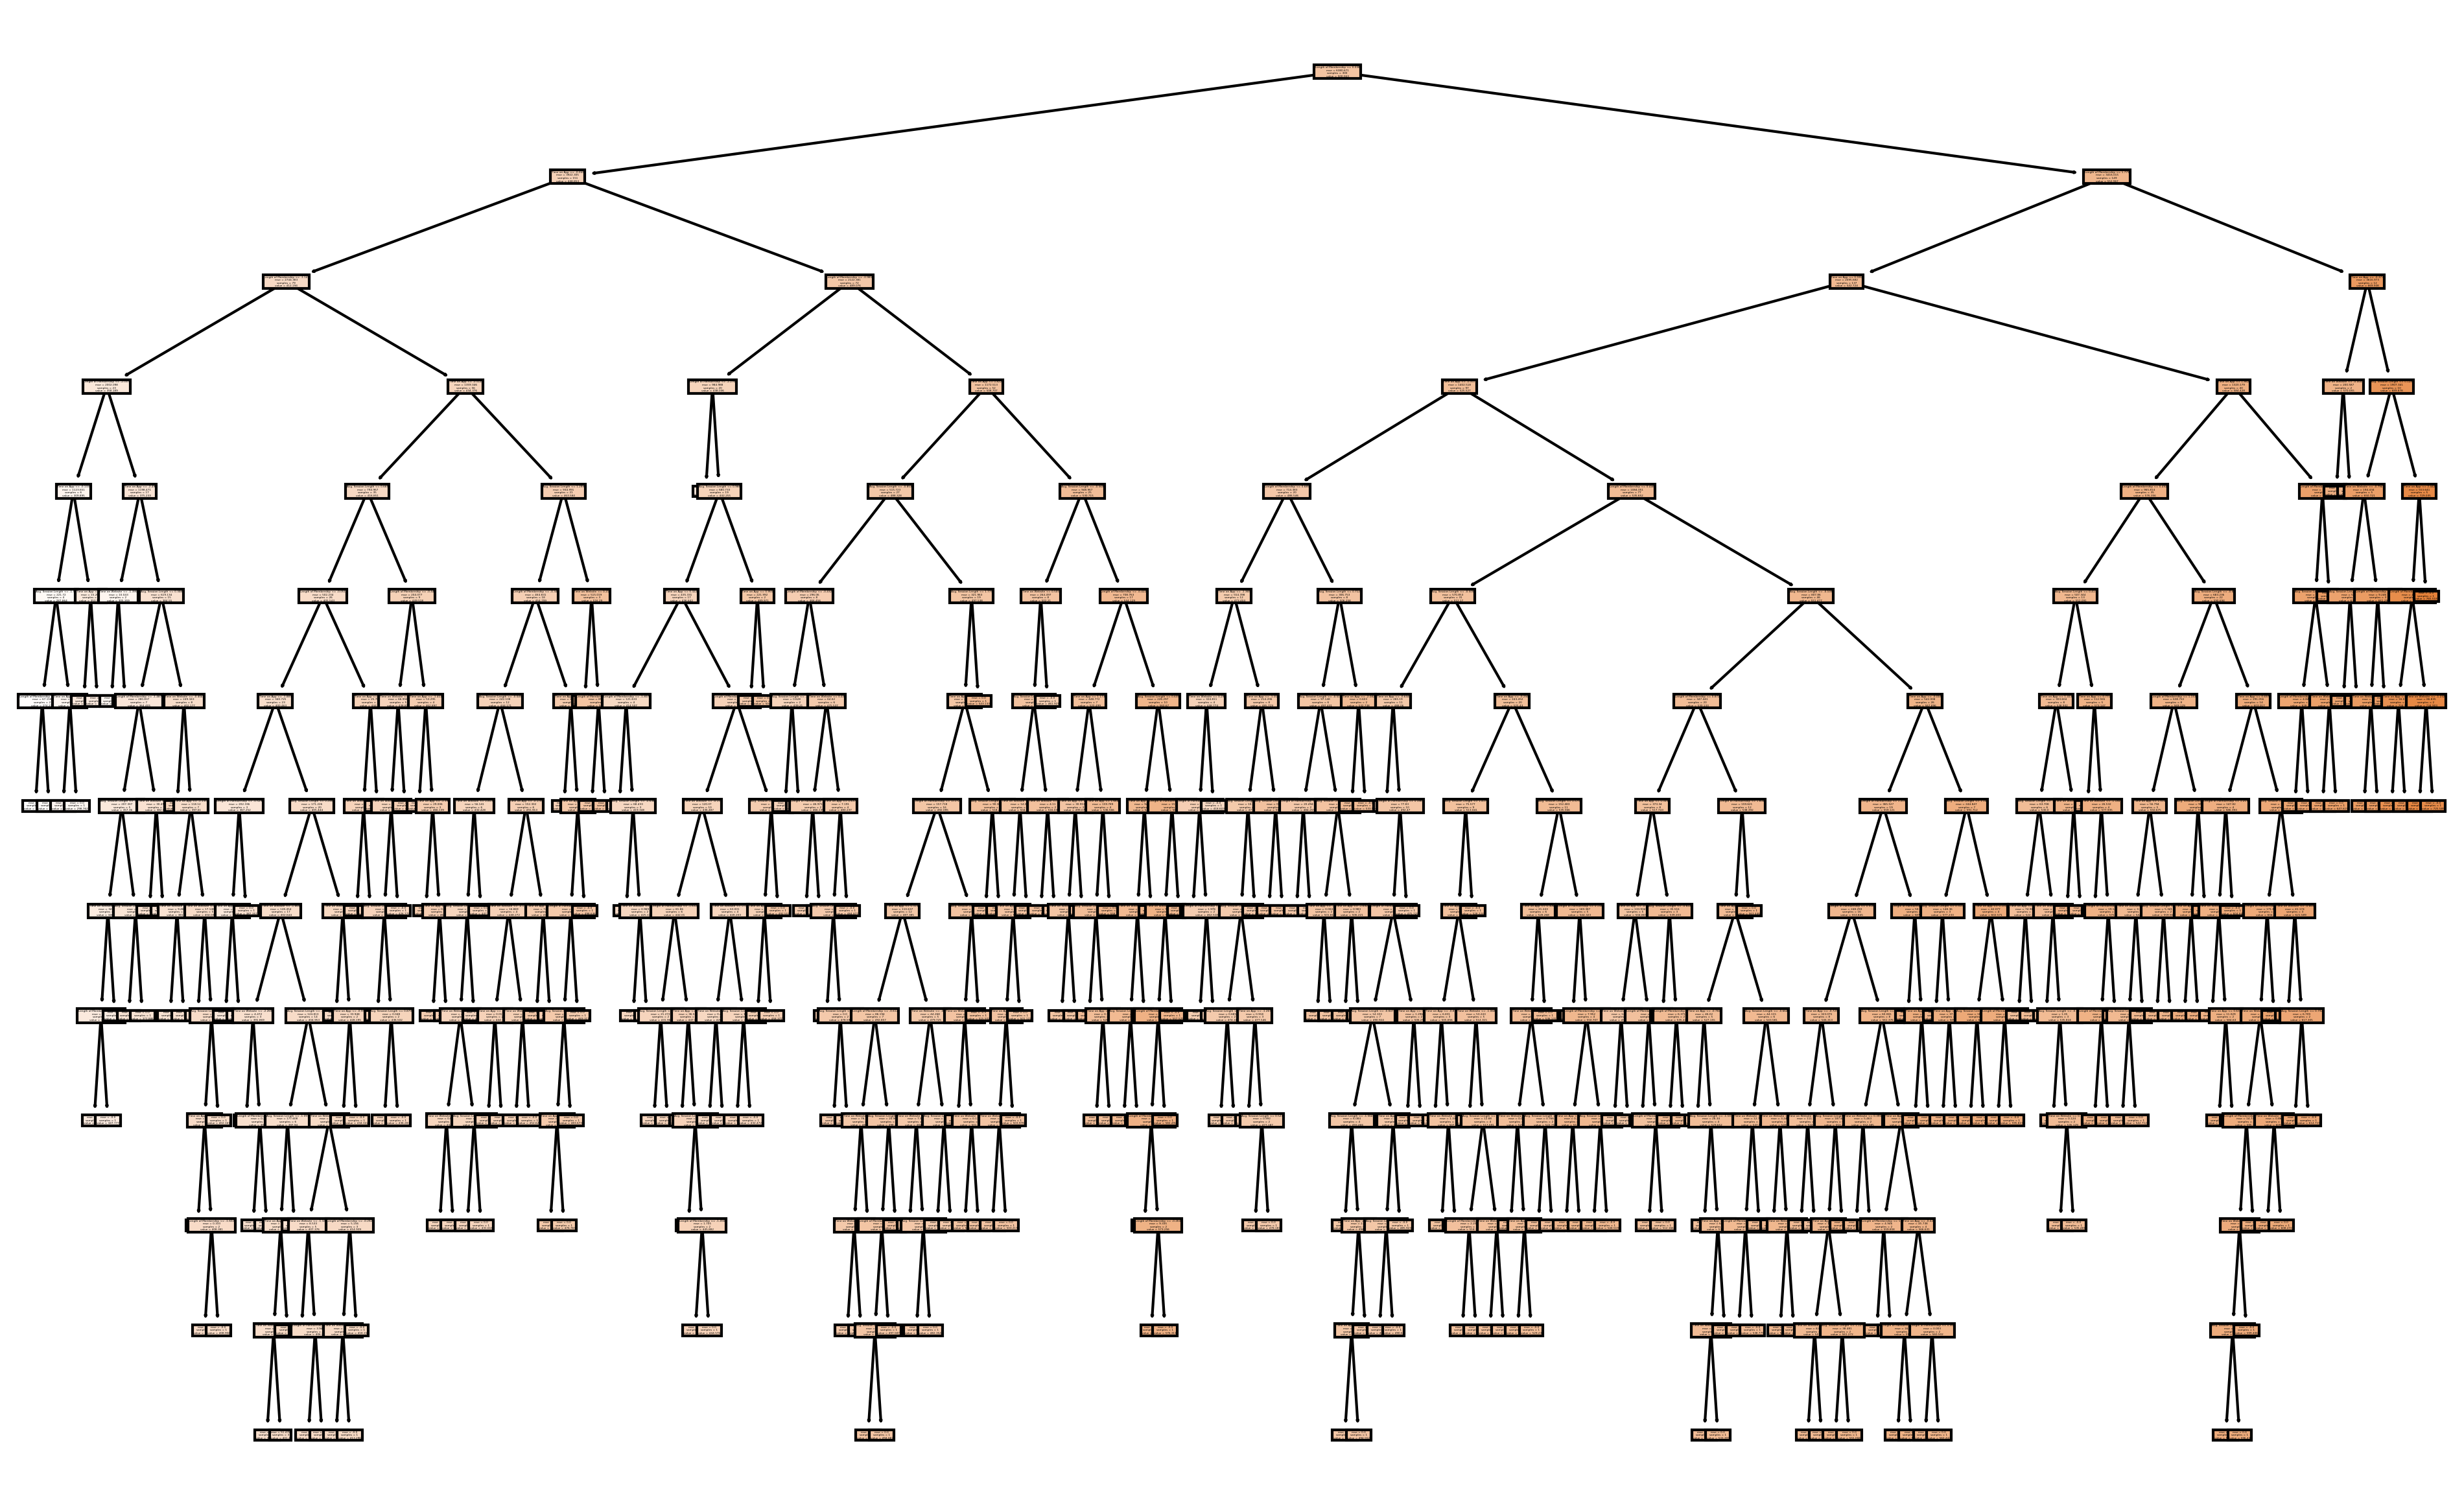

In [12]:
# Plot tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,10), dpi=300)

plot_tree(mdl,
        feature_names=fn, 
        class_names=cn,
        filled=True)

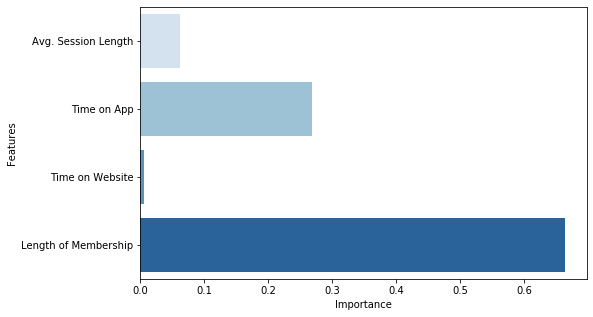

In [13]:
# Feature Importance
relevance = pd.DataFrame()
relevance['Features'] = X.columns 
relevance['Importance'] = mdl.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Features', data=relevance, palette='Blues')

In [14]:
# valor de max_features 
mdl.max_features_

4

In [15]:
# número de saídas do modelo
mdl.n_outputs_

1

In [16]:
# features usadas para a construção da árvore 
mdl.n_features_

4